# Exercise 2

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets

np.random.seed(1234)

In [66]:
x_values = np.random.normal(size = 200)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [67]:
print(x_train.shape)
print(y_train.shape)

(200, 1)
(200, 1)


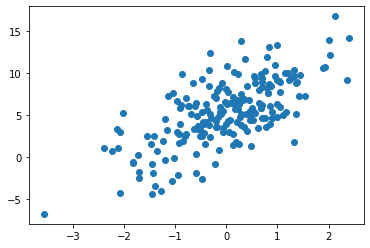

In [68]:
plt.scatter(x_train, y_train)

In [69]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [70]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, hidden_sizes, outputDim)
if torch.cuda.is_available():
    model.cuda()

In [71]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [72]:
for p in range(2, hidden_sizes, 5):
    model = linearRegression(inputDim, p, outputDim)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs = Variable(torch.from_numpy(x_train).cuda())
            labels = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs = Variable(torch.from_numpy(x_train))
            labels = Variable(torch.from_numpy(y_train))
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(43.9202, grad_fn=<MseLossBackward>)
epoch 99, loss 43.9201545715332
tensor(37.1758, grad_fn=<MseLossBackward>)
epoch 99, loss 37.175758361816406
tensor(47.5523, grad_fn=<MseLossBackward>)
epoch 99, loss 47.552303314208984
tensor(44.6813, grad_fn=<MseLossBackward>)
epoch 99, loss 44.6812858581543
tensor(47.0410, grad_fn=<MseLossBackward>)
epoch 99, loss 47.04100036621094
tensor(37.3937, grad_fn=<MseLossBackward>)
epoch 99, loss 37.393714904785156
tensor(43.1932, grad_fn=<MseLossBackward>)
epoch 99, loss 43.193206787109375
tensor(45.9719, grad_fn=<MseLossBackward>)
epoch 99, loss 45.97187423706055
tensor(44.5319, grad_fn=<MseLossBackward>)
epoch 99, loss 44.53193664550781
tensor(45.6454, grad_fn=<MseLossBackward>)
epoch 99, loss 45.64540100097656
tensor(49.6409, grad_fn=<MseLossBackward>)
epoch 99, loss 49.64088821411133
tensor(48.2351, grad_fn=<MseLossBackward>)
epoch 99, loss 48.23514175415039
tensor(46.6169, grad_fn=<MseLossBackward>)
epoch 99, loss 46.61687088012695
tensor(48.

In [73]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[-0.0378762 ]
 [ 0.00581262]
 [-0.06313883]
 [-0.01727003]
 [-0.00654939]
 [-0.04880169]
 [-0.04807705]
 [-0.0087586 ]
 [-0.02589917]
 [ 0.033452  ]
 [-0.05571005]
 [-0.05155548]
 [-0.05054043]
 [ 0.02763274]
 [-0.01670697]
 [-0.02554235]
 [-0.03614217]
 [-0.03308418]
 [-0.06020734]
 [ 0.01516661]
 [-0.02016103]
 [-0.00824752]
 [-0.03056987]
 [-0.0400313 ]
 [-0.06012827]
 [-0.01315308]
 [-0.04324055]
 [ 0.02226552]
 [-0.0206745 ]
 [-0.05331686]
 [-0.01503128]
 [-0.03435467]
 [-0.0530175 ]
 [-0.05297431]
 [-0.04818553]
 [-0.02227804]
 [-0.02876422]
 [-0.01700351]
 [-0.04760632]
 [-0.08832216]
 [-0.02748924]
 [-0.01060024]
 [-0.02643648]
 [ 0.02904466]
 [-0.03199875]
 [-0.00190899]
 [-0.02189165]
 [-0.02596733]
 [-0.04533929]
 [-0.03114401]
 [-0.04758875]
 [ 0.01250982]
 [ 0.01135787]
 [-0.02283451]
 [-0.01107863]
 [-0.02168608]
 [-0.0347905 ]
 [-0.02455339]
 [-0.04035453]
 [-0.06610727]
 [ 0.00011674]
 [-0.02363798]
 [-0.03358027]
 [-0.02000722]
 [-0.05265543]
 [ 0.03759819]
 [-0.07885

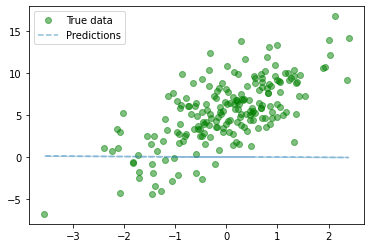

In [74]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()